In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../PROYECTO_FINAL/Laptop_price.csv") 

#data = pd.read_csv("../Proyecto_Machine_Learning/Laptop_price.csv")
 
print(data.head())
print(data.shape)

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  
(1000, 7)


In [3]:
data_nueva = pd.read_csv("Laptop_price.csv")
data_nueva


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


EDA

In [4]:
data_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [8]:
#Contar la cantidad de memoria ram comprada segun su tamaño
memoria_ram = data_nueva['RAM_Size'].value_counts()
memoria_ram

RAM_Size
32    274
8     246
4     243
16    237
Name: count, dtype: int64

In [9]:
#comprar la cantidad de disco duro segun su tamaño
disco_duro = data_nueva['Storage_Capacity'].value_counts()
disco_duro

Storage_Capacity
256     357
1000    336
512     307
Name: count, dtype: int64

In [7]:
#Contar la cantidad de marcas de laptop
marcas = data_nueva['Brand'].value_counts()
marcas

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [8]:
#Verificar si hay valores nulos en data
data_nueva.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [9]:
data_nueva.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


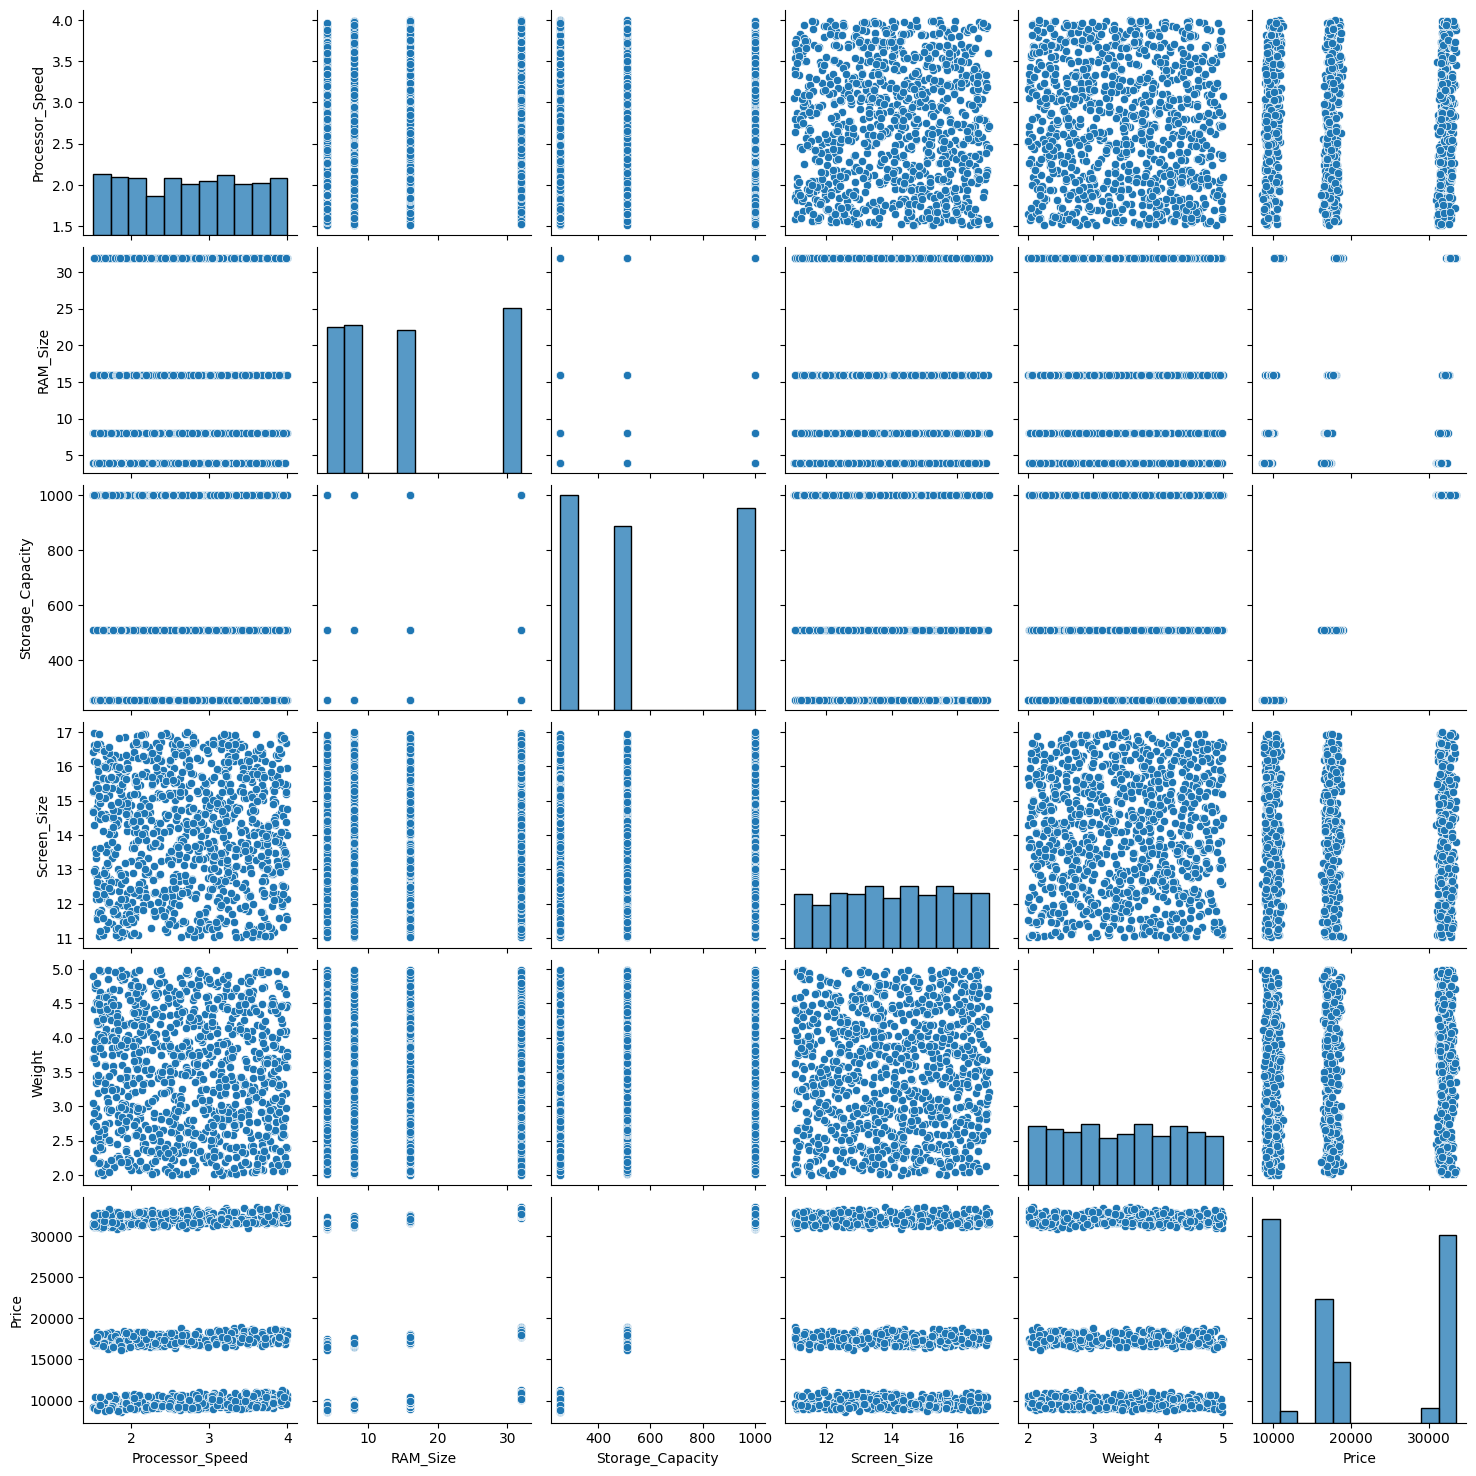

In [9]:
#Ploteo de la data
sns.pairplot(data_nueva)

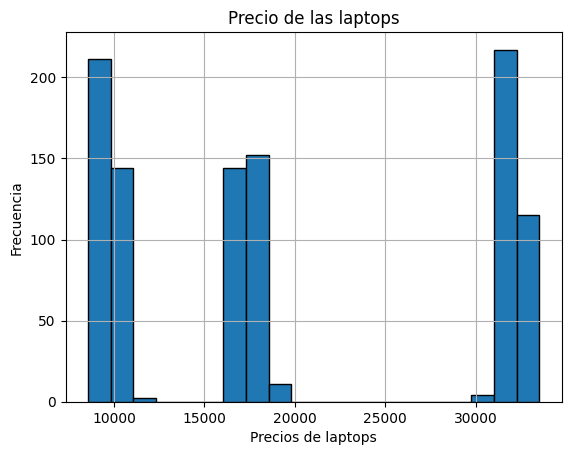

In [26]:
#Grafica para los precios de las laptops
data_nueva['Price'].hist(bins=20, edgecolor='black')
plt.title('Precio de las laptops')
plt.xlabel('Precios de laptops')
plt.ylabel('Frecuencia')
plt.show()

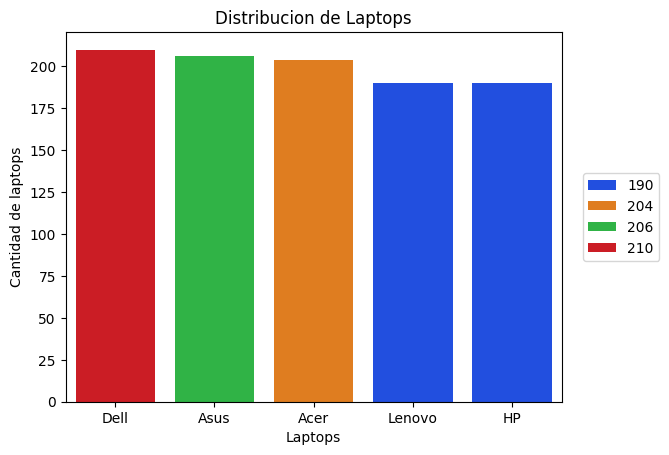

In [35]:
#Grafica para las marcas de laptop
sns.barplot( x=marcas.index, y=marcas.values, palette='bright', hue=marcas.values)
plt.title('Distribucion de Laptops')
plt.xlabel('Laptops')
plt.ylabel('Cantidad de laptops')
plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
plt.show()

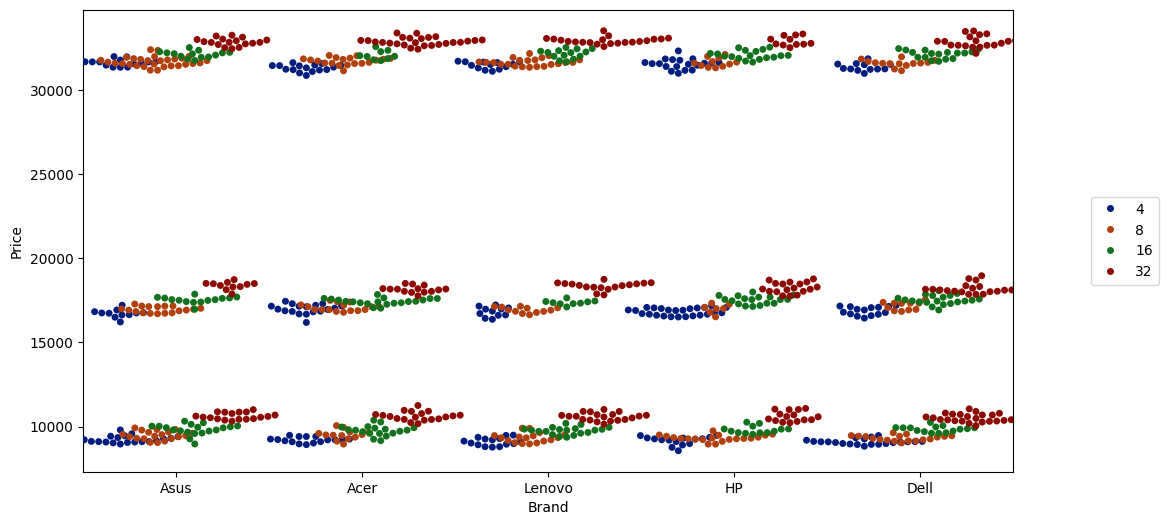

In [63]:
#GRAFICA DE PRECIO DE LAPTOP POR MEMORIA RAM 
#sns.displot(data=data_nueva, x='Price',hue='RAM_Size', kind='kde', legend=True, palette='dark', fill=True,col='RAM_Size')
plt.figure(figsize=(12,6))
sns.swarmplot(data=data_nueva, x='Brand', y='Price', hue='RAM_Size',  palette='dark', dodge=True)
plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
plt.show()

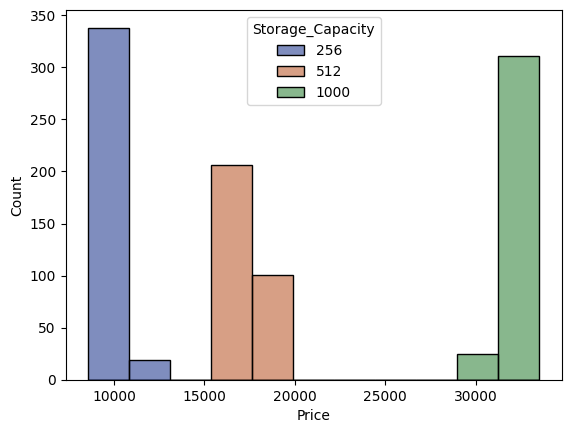

In [39]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO DURO
sns.histplot(data=data_nueva, x='Price', hue='Storage_Capacity', palette='dark')
plt.show()

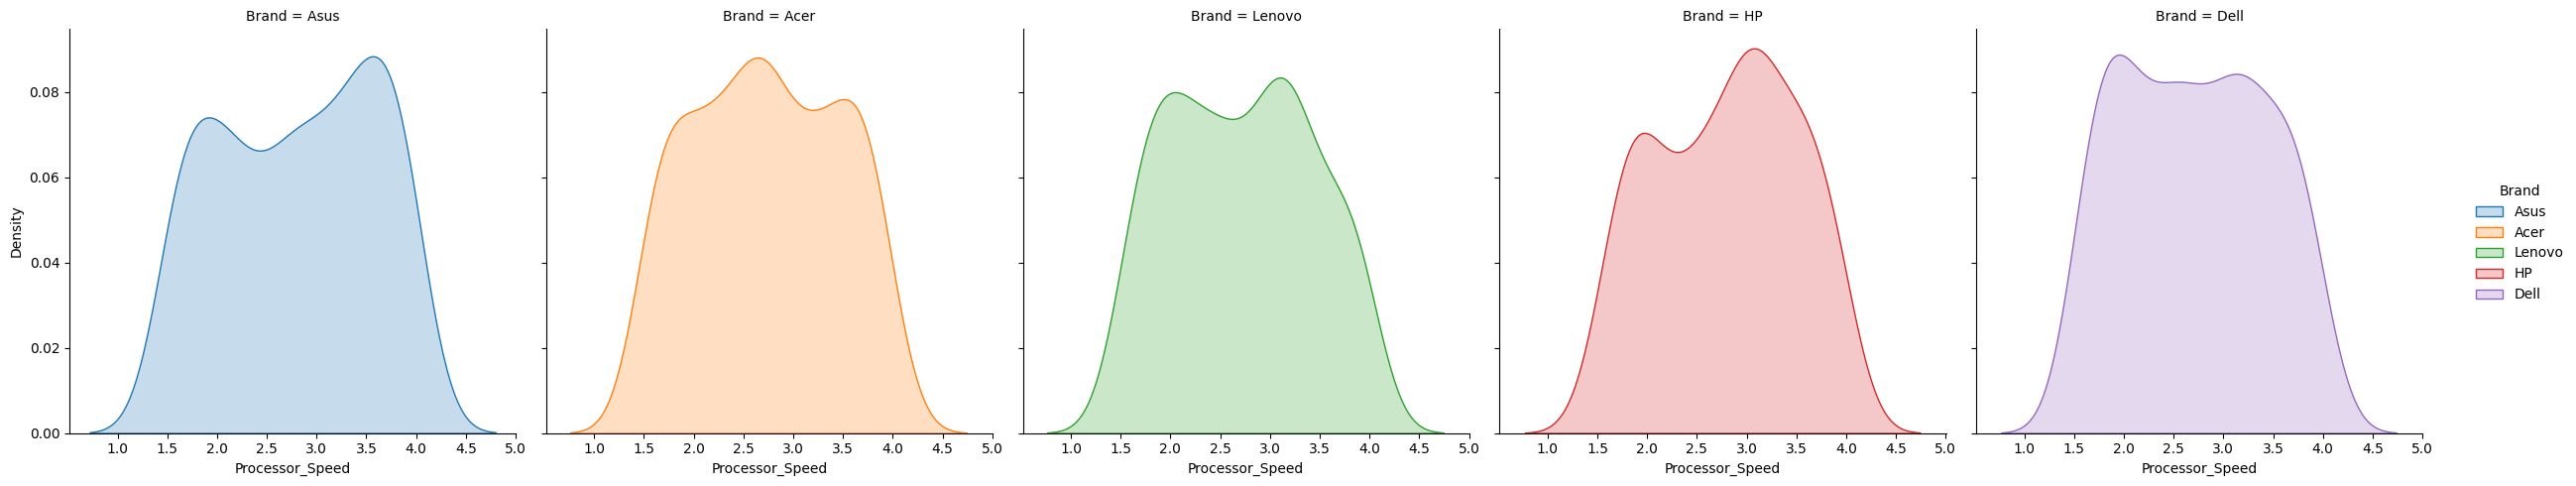

In [46]:
#GRAFICA DE PROCESADORES POR MARCA
sns.displot(data=data_nueva, x='Processor_Speed', hue='Brand', kind='kde',fill=True, col='Brand')
plt.show()

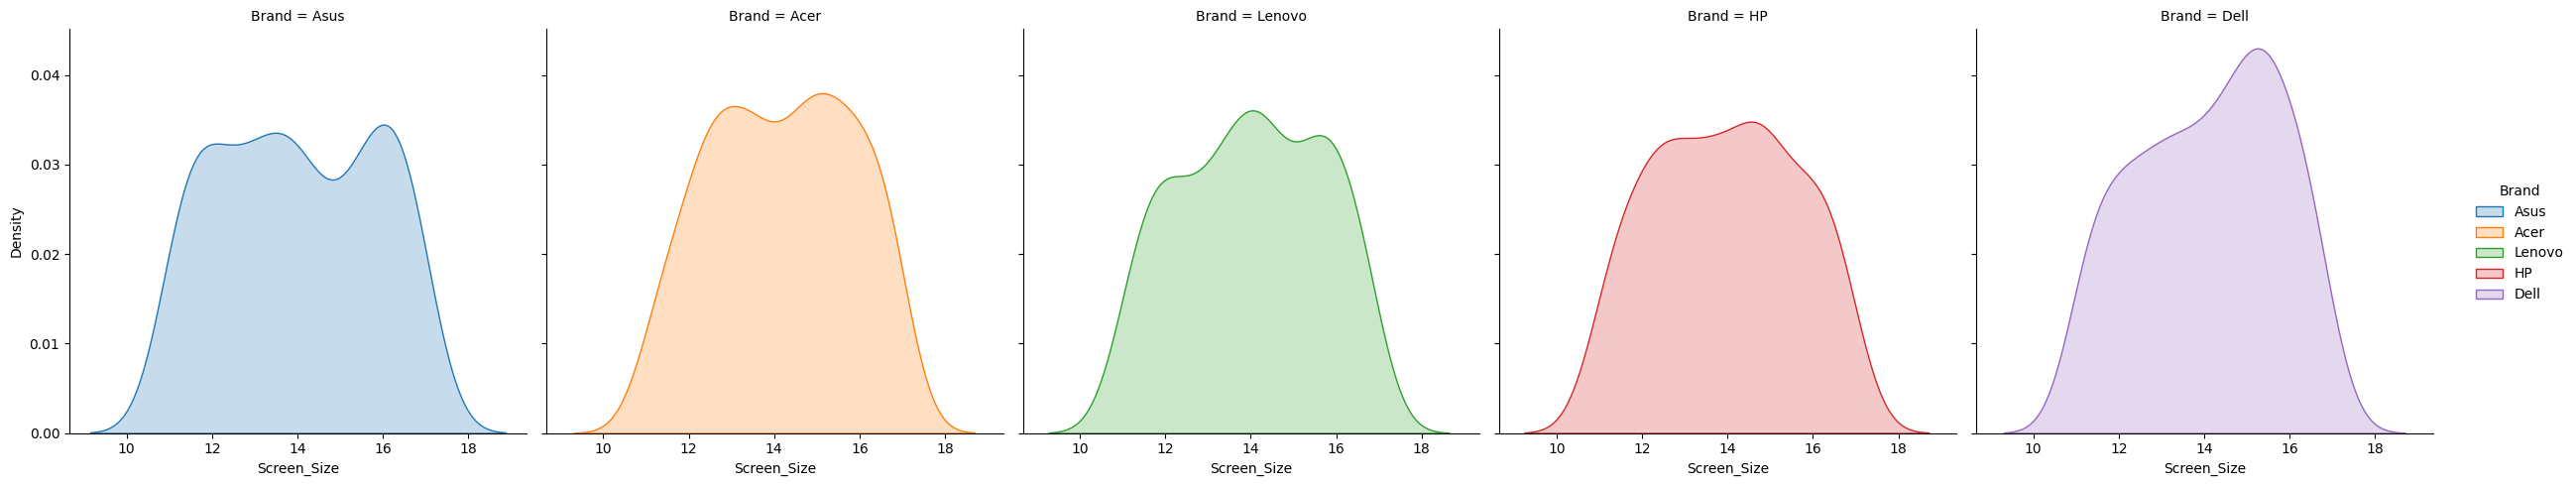

In [45]:
#GRAFICA DE TAMAÑO DE PANTALLA POR MARCA
sns.displot(data=data_nueva, x='Screen_Size', hue='Brand', kind='kde', fill=True, bw_adjust=1,col='Brand')
plt.show()

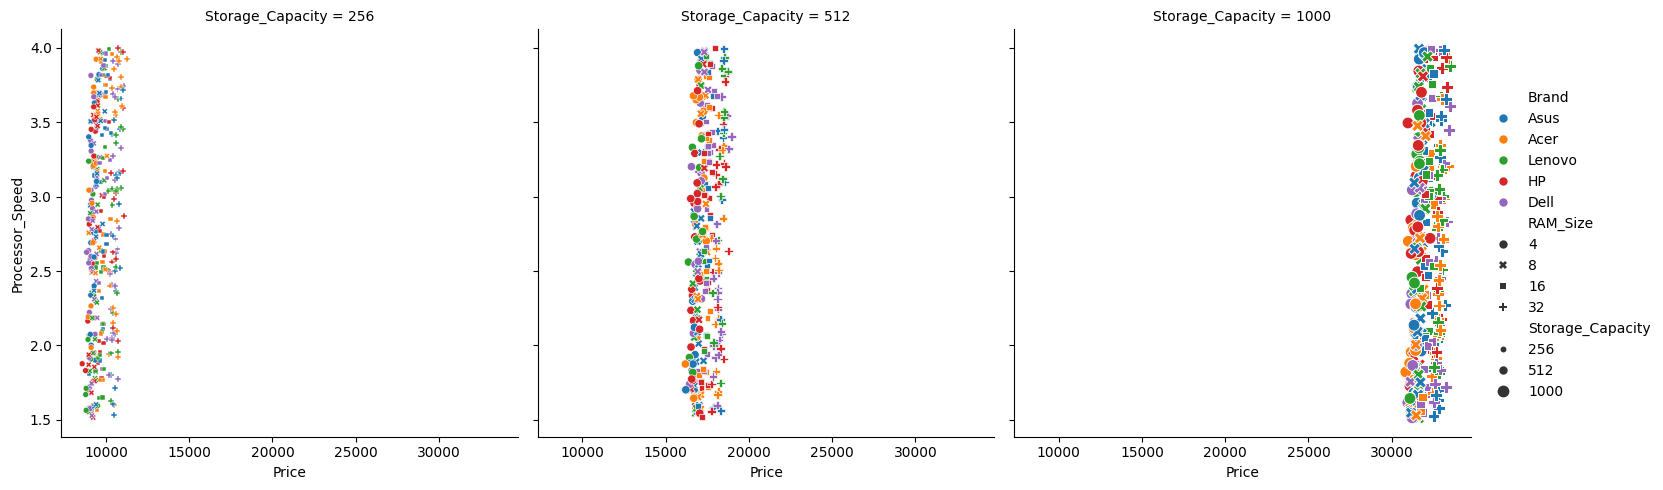

In [50]:
#GRAFICA DE PRECIO POR TAMAÑO DE DISCO SEGUN SU MARCA Y TAMAÑO DE RAM
sns.relplot(data=data_nueva, x='Price', y='Processor_Speed', hue='Brand', style='RAM_Size',
           size='Storage_Capacity', kind='scatter', col='Storage_Capacity')
#plt.legend(loc='center', bbox_to_anchor=(1.22,0.5))
plt.show()

In [10]:
#DIAGRAMA DE CORRELACION
correlacion_diagrama = data_nueva.corr(numeric_only=True)
correlacion_diagrama

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


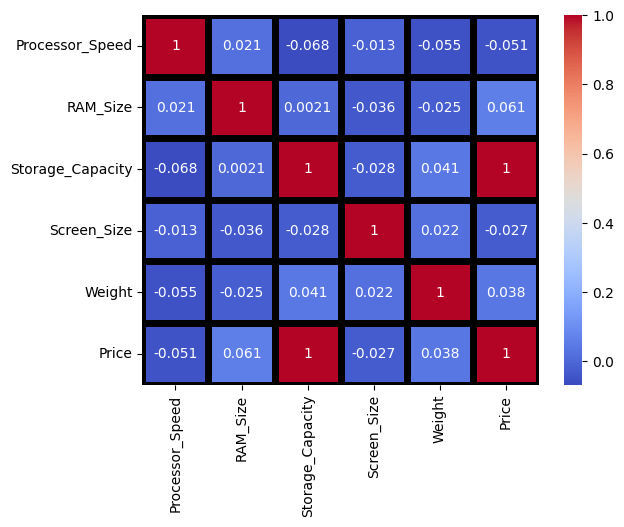

In [16]:
sns.heatmap(correlacion_diagrama, annot=True, cmap='coolwarm', linewidths=5, linecolor='black')
plt.show()

## Modelo de Entrenamiento(Train test split)

In [10]:
#Realizar el metodo de separacion de training - test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_nueva, test_size=0.2, random_state=1516)

In [11]:
#Validamos
train_set.shape

(800, 7)

In [12]:
test_set.shape

(200, 7)